# Session 5: Unsteady-state Heat Conduction


## Session 4 Recap: Steady-State 2D Heat Conduction

- characteristic values
- separation of variables and Fourier transforms
- 2D model in Python

## Unsteady-state Heat Conduction

- While the previous sessions focused on steady-state (time-independent) behavior of heat transfer, practical situations are generally time-dependent. 
    e.g. batteries generate their own heat upon charge and discharge, but are also thermally heated and cooled with external coolant fluid in EVs 
- Biot number is a dimensionless value that indicates this - internal heat resistance versus surface resistance. Bi << 1 if surface resistance dominates and internal resistance is low. in other words, heat transfer to the system is instantaneously distributed throughout the entire system such that temperature is immediately uniform throughout 

### Example 1: One dimensional system

Consider a one dimensional system with temperature a function of x. 

$$\frac{d^2 T}{dx^2}\ =\ \frac{1}{\alpha} \frac{dT}{dt}$$

with initial and boundary conditions $$T(x,0)\ =\ f(x)\\ T(0,t)\ =\ 0\\ T(L,t)\ =\ 0 $$

as before, if we assume a solution exists that allows for separation of variables, then: $$T(x,t)\ =\ e^{-\alpha \lambda ^2 t}(A*sin(\lambda x)+B*cos(\lambda x)) $$

1. apply separation of variables

$$T(x,t)\ =\ X(x)*\Gamma(t) $$

$$\Gamma(t)\frac{d^2X}{dx^2}\ =\ 1/\alpha * X(x)* \frac{dT}{dt} = $$

$$\frac{1}{X(x)}*\frac{d^2X}{dx^2} =  1/(\alpha *\Gamma(t))* \frac{dT}{dt}$$

Set both sides equal to a constant, $$-\lambda^2 $$

2. solve

integrate RHS: $$1/\alpha * ln(\Gamma(t))\ =\ -\lambda^2 * t$$

$$\Gamma(t)\ =\ e^{-\alpha * \lambda^2 t} $$

integrate LHS: $$\frac{d^2 X}{dx^2}\ +\ \lambda^2*X(x)\ =\ 0 $$

$$X(x)\ =\ A*sin(\lambda x)\ +\ B*cos(\lambda x) $$

3. apply BCs

$$ T(x,t)\ =\ e^{-\alpha  \lambda ^2 t} *(A*sin(\lambda x)\ +\ B*cos(\lambda x))$$

a) $$T(0,t)\ =\ e^{-\alpha  \lambda ^2 t} * B\ =\ 0 $$
$$B\ =\ 0,\ A\ =\ finite $$

b) $$T(L,t)\ =\ e^{-\alpha  \lambda ^2 t} *(A*sin(\lambda L)\ =\ 0$$

c) initial condition: $$T(x,0)\ =\  A*sin(\lambda x)\ =\ f(x)$$

$$T(x,t)\ =\ \sum _{n=1}^{\infty} A_n e^{-\alpha \lambda _n^2 t} sin(\lambda _n x) $$

$$f(x)\ =\ \sum _{n=1}^{\infty} A_n sin(n\pi x/L) $$

looking at Table 4.1, this is the Fourier sine expansion of f(x) on the interval (0, L)

$$A_n\ =\ 2/L * \int _0^L f(x) sin(n\pi x/L) dx $$

$$T(x,t)\ =\ 2/L \sum _{n=1}^\infty e^{-\alpha (n\pi /L)^2 t} sin(n \pi x/ L) \int _0^L f(x') sin(n\pi x'/L) dx' $$



### Example 2

Now consider sample problem with initial condition T(x,0) = f(x)
and boundary conditions T(0,t) = T1 and T(L,t) = T2

We can assume solution is a superposition of the initial steady-state solution (T_s) and the transient solution (T_t)

The steady-state solution is readily known from before (see Sessions 2 and 3): it's a linear relationship

$$T_s (x)\ =\ T_1\ -\ (T_1\ -\ T_2)*x/L $$

The transient solution was just found:

$$T_t(x,t)\ =\ \sum _{n=1}^{\infty} A_n e^{-\alpha (n\pi /L)^2 t} sin(n*\pi x/L) $$

Therefore, solution is: 

$$T(x,t) =\ T_1\ -\ (T_1\ -\ T_2)*x/L\ +\ \sum _{n=1}^{\infty} A_n e^{-\alpha (n\pi /L)^2 t} sin(n \pi x/L) $$

Applying initial condition:

$$ f(x)\ =\ T_1\ -\ (T_1\ -\ T_2)*x/L\ +\ \sum _{n=1}^{\infty} A_n  sin(n*\pi x/L)$$

Recognize the third term, once t = 0 and the exponential is gone, this reduces to the Fourier sine expansion of $$F(x)\ =\ f(x)\ -\ T_1\ +\ (T_1\ -\ T_2)*x/L $$

$$ A_n\ =\ 2/L \int _0^L F(x) sin(n\pi x/L) dx$$

$$T(x,t)\ =\ T_1\ -\ (T_1\ -\ T_2)*x/L\ +\ 2/L \sum _{n=1}^{\infty}  e^{-\alpha (n\pi /L)^2 t} sin(n \pi x/L) \int _0^L F(x) sin(n\pi x/L)$$


## Finite Difference Method

$$T(x,y,t)\ =\ T_{x,y}^t $$

$$\frac{dT}{dt}\ -\ \alpha * (\frac{d^2T}{dx^2}\ +\ \frac{d^2T}{dy^2})\ =\ 0 $$

$$\frac{T_{x,y}^{t+1}\ -\ T_{x,y}^{t}}{\Delta t}\ -\ \alpha (\frac{T_{x+1,y}^t\ -2*T_{x,y}^t\ +\ T_{x-1,y}^t}{\Delta x^2}\ +\ \frac{T_{x,y+1}^t\ -2*T_{x,y}^t\ +\ T_{x,y-1}^t}{\Delta y^2})\ =\ 0$$

assuming $$\Delta x\ =\ \Delta y $$

$$T_{x,y}^{t+1}\ =\ \alpha \frac{\Delta t}{\Delta x^2}*(T_{x+1,y}^t\ +\ T_{x-1,y}^t\ +\ T_{x,y-1}^t\ +\ T_{x,y+1}^t\ -\ 4T_{x,y}^t)\ +\ T_{x.y}^t $$

In [1]:
## Citation: https://levelup.gitconnected.com/solving-2d-heat-equation-numerically-using-python-3334004aa01a

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

plate_length = 50
max_iter_time = 1000

alpha = 2.0
delta_x = 1

# Calculated params
delta_t = (delta_x ** 2)/(4 * alpha) #if delta_t is any higher, it will result in a value greater than 1 multipled with T_x,y leading to a numerically unstable solution (values will just get bigger and bigger with each time step)
gamma = (alpha * delta_t) / (delta_x ** 2) #this is the constant before the finite difference terms 

# Initialize solution: the grid of T(t, x, y)
T = np.empty((max_iter_time, plate_length, plate_length))

# Initial condition everywhere inside the grid
T_initial = 0.0

# Boundary conditions (fixed temperature)
T_top = 100.0
T_left = 0.0
T_bottom = 0.0
T_right = 0.0

# Set the initial condition
T.fill(T_initial)

# Set the boundary conditions
T[:, (plate_length-1):, :] = T_top
T[:, :, :1] = T_left
T[:, :1, 1:] = T_bottom
T[:, :, (plate_length-1):] = T_right


20.3796146229937


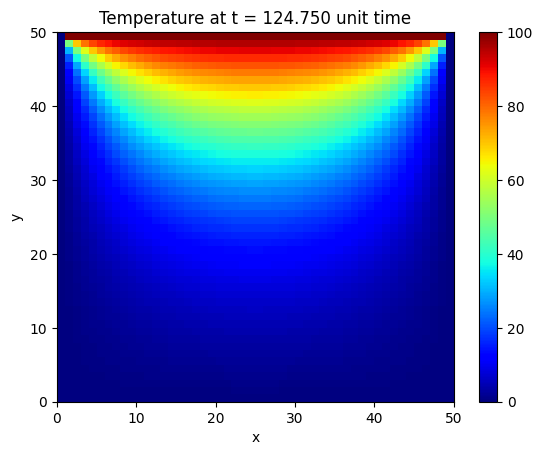

In [2]:
def fdm(T):
  for t in range(0, max_iter_time-1, 1):
    for x in range(1, plate_length-1, delta_x):
      for y in range(1, plate_length-1, delta_x):
        T[t + 1, x, y] = gamma * (T[t][x+1][y] + T[t][x-1][y] + T[t][x][y+1] + T[t][x][y-1] - 4*T[t][x][y]) + T[t][x][y]
  
  return T

def plotheatmap(T, k):
  # Clear the current plot figure
  plt.clf()
  plt.title(f"Temperature at t = {k*delta_t:.3f} unit time")
  plt.xlabel("x")
  plt.ylabel("y")
  
  # This is to plot u_k (u at time-step k)
  plt.pcolormesh(T, cmap=plt.cm.jet, vmin=0, vmax=100)
  plt.colorbar()
  
  return plt

T = fdm(T)
print(T[100, 40, 30])
k = 998
plotheatmap(T[k], k)
plt.show()

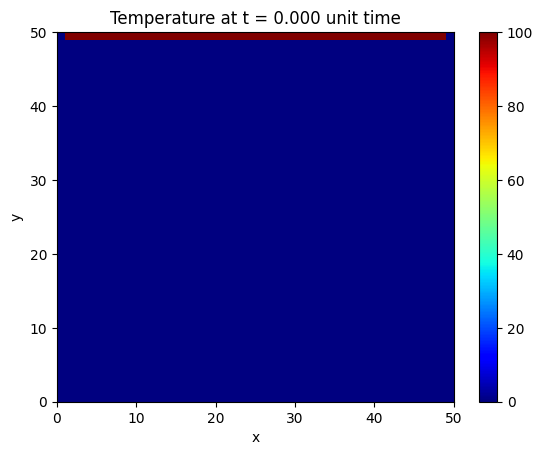

In [3]:
from IPython.display import HTML

def animate(k):
    plotheatmap(T[k], k)

interval = 5 #time in milliseconds between frames 
anim = animation.FuncAnimation(plt.figure(), animate, interval=interval, frames=max_iter_time, repeat=False)
anim.save("heat_equation_solution.mp4")

file = "heat_equation_solution.mp4"

# Use the HTML function to embed the video
HTML(f'<video controls src="{file}" width="640" height="480"></video>')


### Example 3

A slab with length L (x-direction) is at temperature T0 initially. Surface temperatures are always at T1 (x = 0) and T2 (x = L). What is the transient temperature solution?

$$ f(x)\ =\ T_1\ -\ (T_1\ -\ T_2)*x/L\ +\ \sum _{n=1}^{\infty} A_n  sin(n*\pi x/L)$$

$$ A_n\ =\ 2/L \int _0^L T_0 sin(n\pi x/L) dx$$

$$T(x,t)\ =\ T_1\ -\ (T_1\ -\ T_2)*x/L\ +\ 2/L \sum _{n=1}^{\infty}  e^{-\alpha (n\pi /L)^2 t} sin(n \pi x/L) \int _0^L T_0 sin(n\pi x/L)$$

$$A_n\ =\ 2/(n\pi)[(-1)^n T_2\ -\ T_1]\ +\ 2/L \int _0^L T_0 sin(n\pi x/L)dx $$

$$A_n\ =\ 2/(n\pi)[(-1)^n T_2\ -\ T_1]\ +\ 2/(n\pi) [1-(-1)^n]T_0 $$

## How to read a paper

- what is a peer-reviewed article?
    - based on an archaic principle from Old English times (Royal Society of Chemistry)
    - do science experiments, write a report on the results and findings, and distribute to a small circle of others who understand your specific research field in the form of a manuscript. prior to publication, get it checked and reviewed by peers to ensure the study is valid (not a perfect system)
- first, how do we find papers? Google Scholar and alerts on specific researchers
- how do we categorize and organize papers? Citation manager. Mendeley, Zotero, Paperpile
- how do we navigate a research field? review papers and perspectives, letters and research papers 

- quick skim: intro, figures and figure captions, conclusion
- then: dig into each section

## Problem Set 4

1. For Problem 1 in Problem Set 3, pick one of the two boundary conditions, now assume non-steady-state conditions and plot an animation of the resulting changes in temperature profile. Provide some exact temperature measurements at several locations (you pick). Show/explain the code, the assumptions made, and the finite difference approach used.  

2. For the following rectangular cross-section at steady-state, find the temperature profile by first determining the appropriate characteristic value problem. 

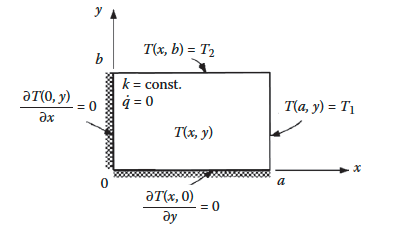

3. A slab of thickness L is initially at $T_i$. For t > 0 the temperature of the surface at x = L is maintained at $T_w$, whereas the other side at x = 0 is kept insulated (i.e. no temperature gradient). Determine the unsteady temperature profile T(x,t) by using boundary conditions that enable use of separation of variables. 

4. Read (to be discussed as a group next session) and try to digest:

https://doi.org/10.1016/j.jpowsour.2013.11.107 
